In [5]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from astropy.convolution import convolve
import scipy.stats
from tqdm import tqdm
from skimage.restoration import denoise_tv_bregman
from numpy.linalg import norm
import scipy
import bm3d

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def interpolate_nn(data: np.array) -> np.array:
    """
    Function to fill nan values in a 2D array using nearest neighbor
    interpolation.

    Source: https://stackoverflow.com/a/27745627
    """
    ind = nd.distance_transform_edt(np.isnan(data),
                                    return_distances=False,
                                    return_indices=True)
    return data[tuple(ind)]


# Ouverture des fichiers 


In [7]:
filename_out_0 = "NewAltoHospicio_012020_062021_Orb_Stack.tif"
filename_out_1 = "NewAltoHospicio_012020_072021_Orb_Stack.tif"
filename_out_2 = "NewAltoHospicio_012020_082021_Orb_Stack.tif"
filename_out_3 = "NewAltoHospicio_012020_092021_Orb_Stack.tif"
filename_out_4 = "NewAltoHospicio_012020_102021_Orb_Stack.tif"
filename_out_5 = "NewAltoHospicio_012020_112021_Orb_Stack.tif"
filename_out_6 = "NewAltoHospicio_012020_122021_Orb_Stack.tif"
filename_out_7 = "NewAltoHospicio_012020_012022_Orb_Stack.tif"
filename_out_8 = "NewAltoHospicio_012020_022022_Orb_Stack.tif"

image0 = tifffile.imread(filename_out_0)
image1 = tifffile.imread(filename_out_1)
image2 = tifffile.imread(filename_out_2)
image3 = tifffile.imread(filename_out_3)
image4 = tifffile.imread(filename_out_4)
image5 = tifffile.imread(filename_out_5)
image6 = tifffile.imread(filename_out_6)
image7 = tifffile.imread(filename_out_7)
image8 = tifffile.imread(filename_out_8)


In [8]:

image_1 = image0[0,:,:] + 1j*image0[1,:,:] 

image_2 = image0[2,:,:] + 1j*image0[3,:,:] 

image_3 = image1[2,:,:] + 1j*image1[3,:,:] 

image_4 = image2[2,:,:] + 1j*image2[3,:,:] 

image_5 = image3[2,:,:] + 1j*image3[3,:,:] 

image_6 = image4[2,:,:] + 1j*image4[3,:,:] 

image_7 = image5[2,:,:] + 1j*image5[3,:,:] 

image_8 = image6[2,:,:] + 1j*image6[3,:,:] 

image_9 = image7[2,:,:] + 1j*image7[3,:,:] 

image_10 = image8[2,:,:] + 1j*image8[3,:,:] 


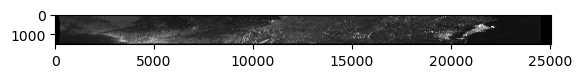

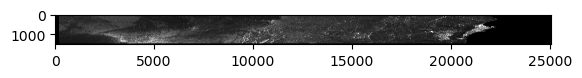

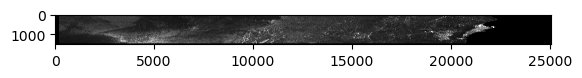

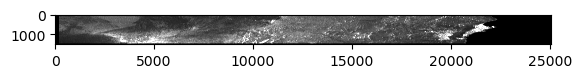

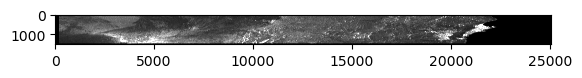

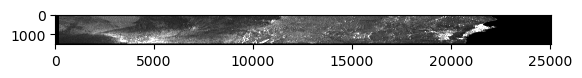

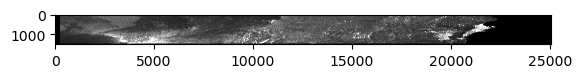

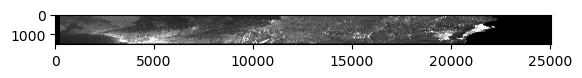

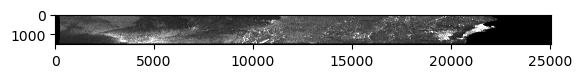

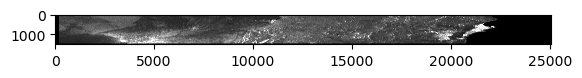

In [9]:
plt.imshow(np.abs(image_1),cmap="gray",vmax= 1/60* np.max(np.abs(image_1)))
plt.show()

plt.imshow(np.abs(image_2),cmap="gray",vmax= 1/60* np.max(np.abs(image_2)))
plt.show()

plt.imshow(np.abs(image_3),cmap="gray",vmax= 1/60* np.max(np.abs(image_3)))
plt.show()

plt.imshow(np.abs(image_4),cmap="gray",vmax= 1/60* np.max(np.abs(image_4)))
plt.show()

plt.imshow(np.abs(image_5),cmap="gray",vmax= 1/60* np.max(np.abs(image_5)))
plt.show()

plt.imshow(np.abs(image_6),cmap="gray",vmax= 1/60* np.max(np.abs(image_6)))
plt.show()

plt.imshow(np.abs(image_7),cmap="gray",vmax= 1/60* np.max(np.abs(image_7)))
plt.show()

plt.imshow(np.abs(image_8),cmap="gray",vmax= 1/60* np.max(np.abs(image_8)))
plt.show()

plt.imshow(np.abs(image_9),cmap="gray",vmax= 1/60* np.max(np.abs(image_9)))
plt.show()

plt.imshow(np.abs(image_10),cmap="gray",vmax= 1/60* np.max(np.abs(image_10)))
plt.show()

# Specification de la zone de pixels  

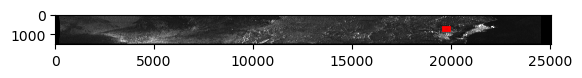

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import numpy as np  # Assurez-vous d'importer la bibliothèque numpy

# Supposons que image_1 est déjà définie

# Définir les limites de la zone à visualiser
sy_start, sy_end = 650, 800
sx_start, sx_end = 19600, 19900

# Extraire la zone spécifiée de l'image
cropped_img = np.abs(image_1[sy_start:sy_end, sx_start:sx_end])  # Assurez-vous d'utiliser np.abs pour une image complexe

# Afficher l'image avec une figure
fig, ax = plt.subplots()

# Afficher l'image
ax.imshow(np.abs(image_1), cmap="gray", vmax=1/60*np.max(np.abs(image_1)))

# Ajouter un marqueur sur la zone spécifiée
rect = patches.Rectangle((sx_start, sy_start), sx_end - sx_start, sy_end - sy_start,
                         linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Afficher la figure
plt.show()


In [11]:
sy = np.s_[650:800] 
sx = np.s_[19600:19900]

#sy = np.s_[600:1200] 
#sx = np.s_[14400:16900]

img1 = image_1[sy, sx]

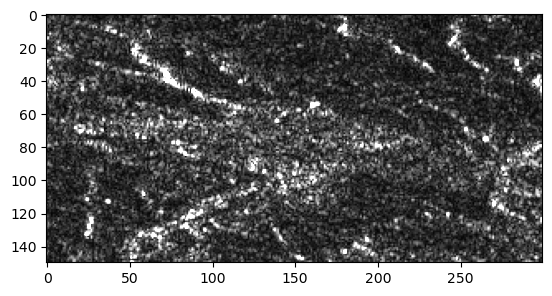

In [12]:
plt.imshow(np.abs(img1),cmap="gray",vmax= 1/5* np.max(np.abs(img1)))
plt.show()

In [13]:
img2 = image_2[sy, sx]

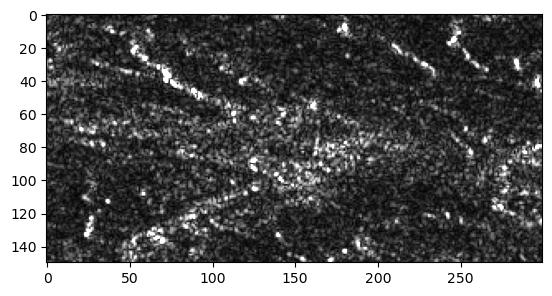

In [14]:
plt.imshow(np.abs(img2),cmap="gray",vmax= 1/5* np.max(np.abs(img2)))
plt.show()

In [15]:
img3 = image_3[sy, sx]


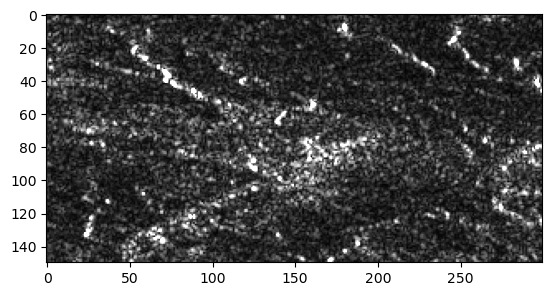

In [16]:
plt.imshow(np.abs(img3),cmap="gray",vmax= 1/5* np.max(np.abs(img3)))
plt.show()


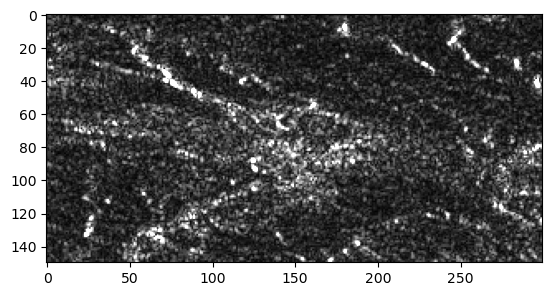

In [17]:
img4 = image_4[sy, sx]
plt.imshow(np.abs(img4),cmap="gray",vmax= 1/5* np.max(np.abs(img4)))
plt.show()

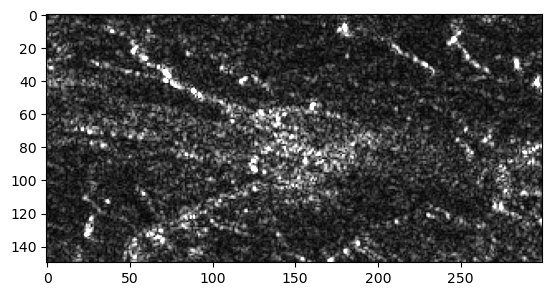

In [18]:
img5 = image_5[sy, sx]
plt.imshow(np.abs(img5),cmap="gray",vmax= 1/5* np.max(np.abs(img5)))
plt.show()

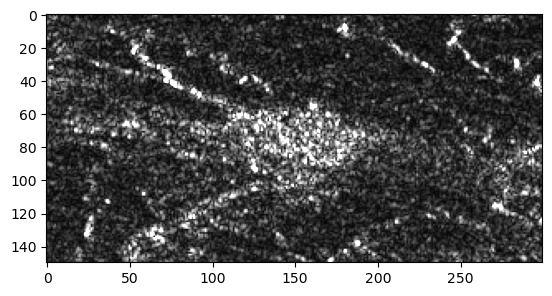

In [19]:
img6 = image_6[sy, sx]
plt.imshow(np.abs(img6),cmap="gray",vmax= 1/5* np.max(np.abs(img6)))
plt.show()

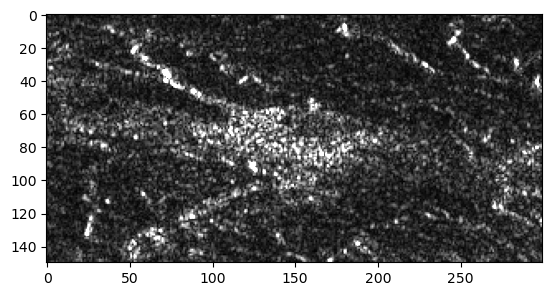

In [20]:
img7 = image_7[sy, sx]
plt.imshow(np.abs(img7),cmap="gray",vmax= 1/5* np.max(np.abs(img7)))
plt.show()

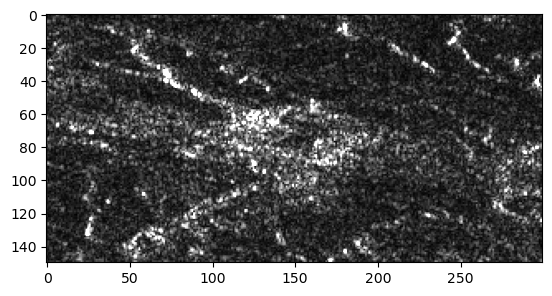

In [21]:
img8 = image_8[sy, sx]
plt.imshow(np.abs(img8),cmap="gray",vmax= 1/5* np.max(np.abs(img8)))
plt.show()

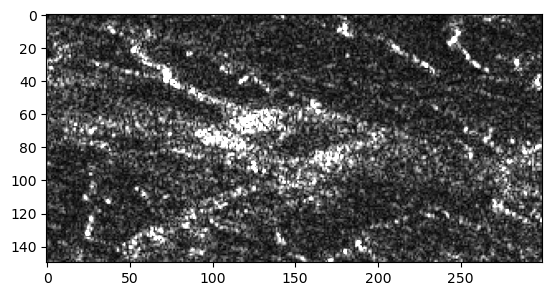

In [22]:
img9 = image_9[sy, sx]
plt.imshow(np.abs(img9),cmap="gray",vmax= 1/5* np.max(np.abs(img9)))
plt.show()

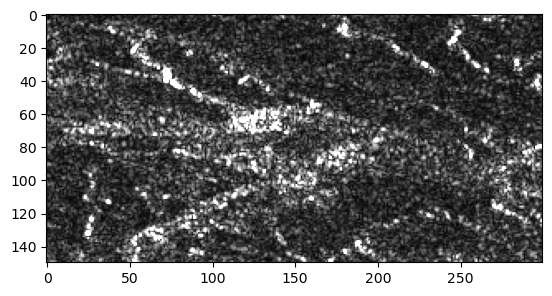

In [23]:
img10 = image_10[sy, sx]
plt.imshow(np.abs(img10),cmap="gray",vmax= 1/5* np.max(np.abs(img10)))
plt.show()

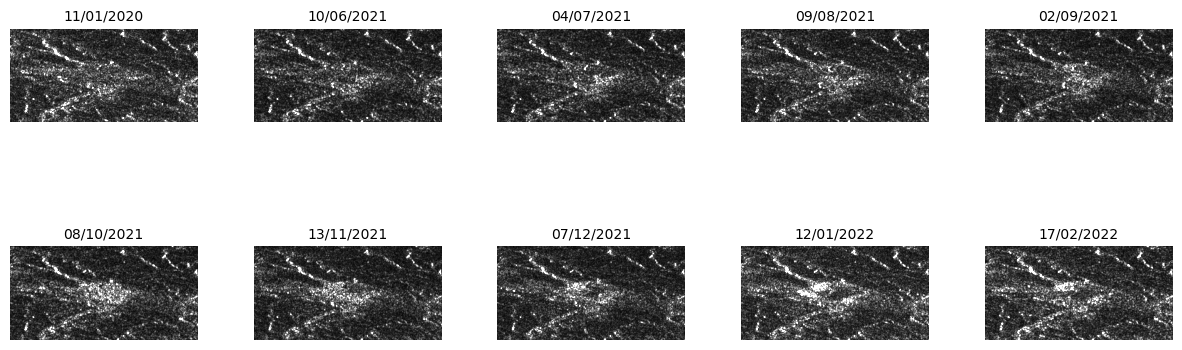

In [24]:
from datetime import datetime

images = [img1, img2, img3, img4, img5, img6, img7, img8, img9, img10]

dates = ["11/01/2020","10/06/2021","04/07/2021","09/08/2021","02/09/2021","08/10/2021","13/11/2021","07/12/2021","12/01/2022","17/02/2022"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


# Forming the ratio image

In [25]:
reference_image = img1
def ratio(img, reference_img):
    # Ajoutez une petite valeur à reference_img pour éviter la division par zéro
    for i in range (np.shape(reference_img)[0]):
        for j in range (np.shape(reference_img)[1]):
             if reference_img[i, j] == 0.+0.j:
                    reference_img[i, j] = 1e-3+0.j               
    return np.clip(img / reference_image, 1e-3, 10)

ratio_img1 = ratio (img2, reference_image)
ratio_img2 = ratio (img3, reference_image) 
ratio_img3 = ratio (img4, reference_image)
ratio_img4 = ratio (img5, reference_image)
ratio_img5 = ratio (img6, reference_image)
ratio_img6 = ratio (img7, reference_image)
ratio_img7 = ratio (img8, reference_image)
ratio_img8 = ratio (img9, reference_image)
ratio_img9 = ratio (img10, reference_image)

ratio_real1 = np.real(ratio_img1)
ratio_real2 = np.real(ratio_img2)
ratio_real3 = np.real(ratio_img3)
ratio_real4 = np.real(ratio_img4)
ratio_real5 = np.real(ratio_img5)
ratio_real6 = np.real(ratio_img6)
ratio_real7 = np.real(ratio_img7)
ratio_real8 = np.real(ratio_img8)
ratio_real9 = np.real(ratio_img9)

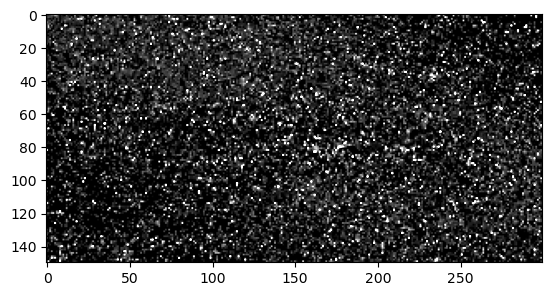

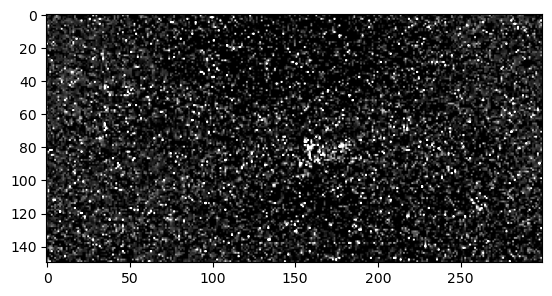

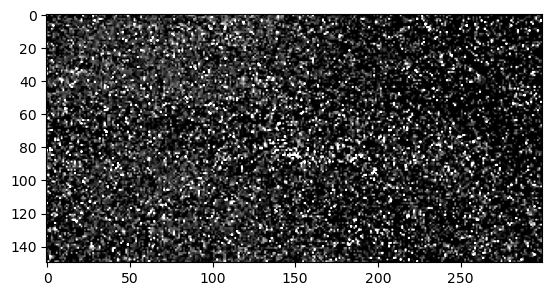

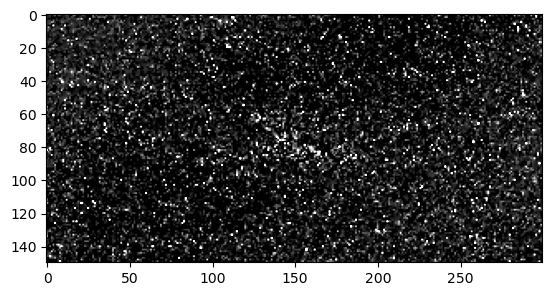

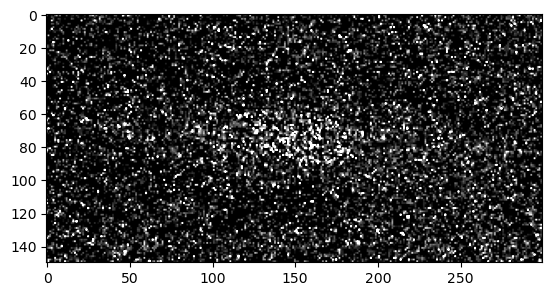

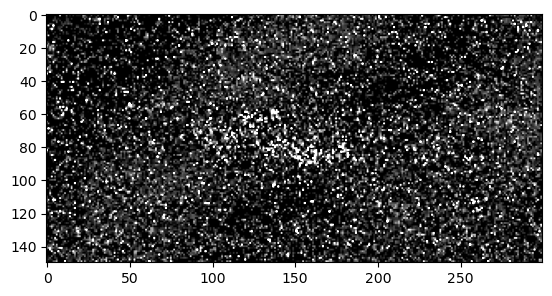

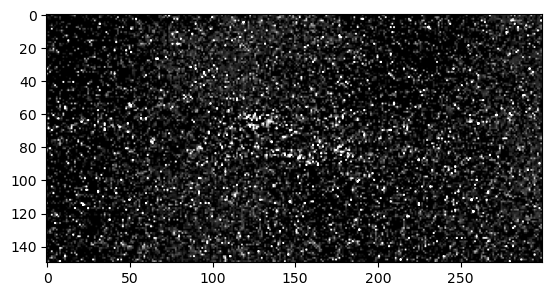

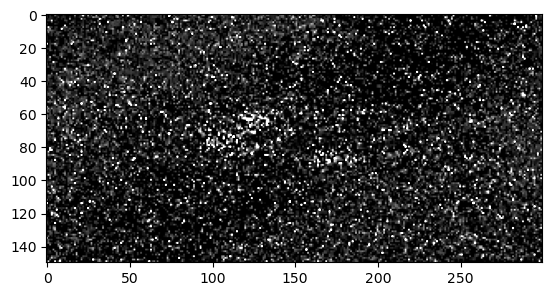

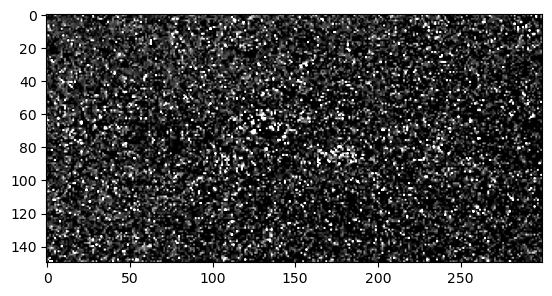

In [26]:
#affichage de l'image ratio: 
plt.imshow(np.abs(ratio_img1),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img1)))
plt.show()
plt.imshow(np.abs(ratio_img2),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img2)))
plt.show()
plt.imshow(np.abs(ratio_img3),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img3)))
plt.show()
plt.imshow(np.abs(ratio_img4),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img4)))
plt.show()
plt.imshow(np.abs(ratio_img5),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img5)))
plt.show()
plt.imshow(np.abs(ratio_img6),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img6)))
plt.show()
plt.imshow(np.abs(ratio_img7),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img7)))
plt.show()
plt.imshow(np.abs(ratio_img8),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img8)))
plt.show()
plt.imshow(np.abs(ratio_img9),cmap="gray",vmax= 1/10* np.max(np.abs(ratio_img9)))
plt.show()

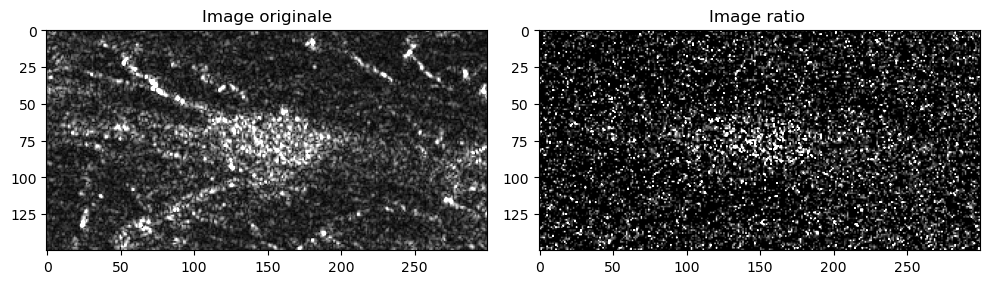

In [27]:
# Affichage de l'image originale (img2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.abs(img6),cmap="gray",vmax= 1/5* np.max(np.abs(img6)))
plt.title('Image originale')

# Affichage de l'image ratio (ratio_img2)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(ratio_img5), cmap="gray", vmax=1/10 * np.max(np.abs(ratio_img5)))
plt.title('Image ratio ')

# Afficher les deux images côte à côte
plt.tight_layout()
plt.show()


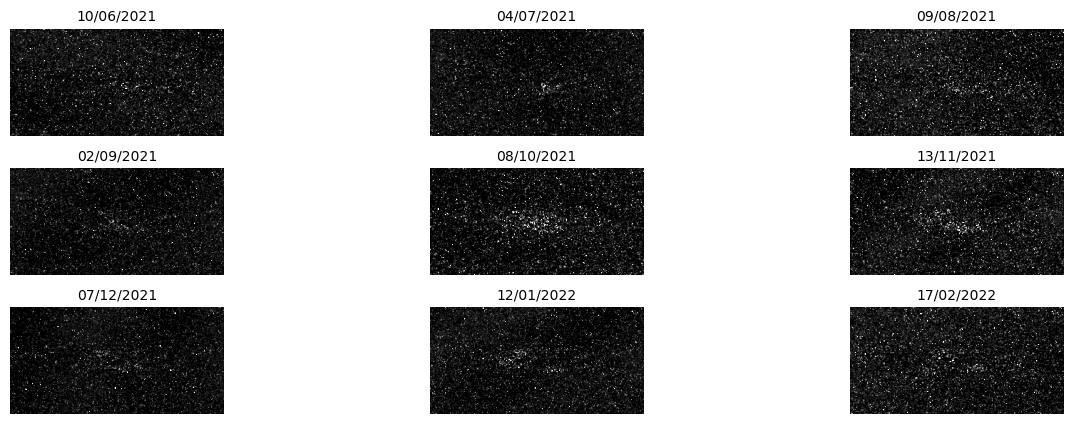

In [28]:
from datetime import datetime

images = [ratio_img1, ratio_img2, ratio_img3, ratio_img4, ratio_img5, ratio_img6, ratio_img7, ratio_img8, ratio_img9]

dates = ["10/06/2021","04/07/2021","09/08/2021","02/09/2021","08/10/2021","13/11/2021","07/12/2021","12/01/2022","17/02/2022"]

date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

for i, (img, date) in enumerate(zip(images, date_objects)):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].imshow(np.abs(img), cmap="gray", vmax=1/5 * np.max(np.abs(img)))
    axes[row_index, col_index].axis('off')  # Désactivez les axes pour une meilleure présentation
    axes[row_index, col_index].set_title(date.strftime("%d/%m/%Y"), fontsize=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


In [29]:
#interpolation
ratio_nn1= list(map(interpolate_nn,tqdm(ratio_real1)))

100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 30029.38it/s]


In [30]:
#interpolation
ratio_nn2= list(map(interpolate_nn,tqdm(ratio_real2)))

100%|█████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 22506.46it/s]


# Denoising

In [31]:
from skimage import io, img_as_ubyte
from skimage.restoration import denoise_tv_bregman
import cv2

In [32]:
# débruitage avec le filtre TV-Bregman (débruitage anisotrope)
image_denoised1 = denoise_tv_bregman(ratio_real1, weight=0.1)
image_denoised2 = denoise_tv_bregman(ratio_real2, weight=0.1)
image_denoised3 = denoise_tv_bregman(ratio_real3, weight=0.1)
image_denoised4 = denoise_tv_bregman(ratio_real4, weight=0.1)
image_denoised5 = denoise_tv_bregman(ratio_real5, weight=0.1)
image_denoised6 = denoise_tv_bregman(ratio_real6, weight=0.1)
image_denoised7 = denoise_tv_bregman(ratio_real7, weight=0.1)
image_denoised8 = denoise_tv_bregman(ratio_real8, weight=0.1)
image_denoised9 = denoise_tv_bregman(ratio_real9, weight=0.1)

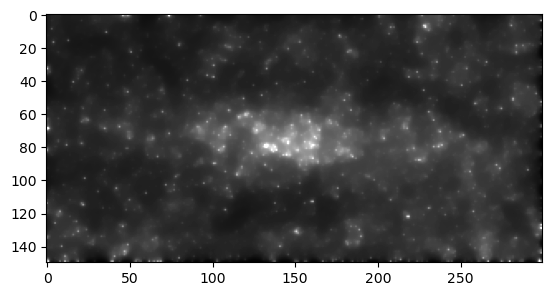

In [33]:
#affichage de l'image débruitée : 
plt.imshow(image_denoised5,cmap="gray",vmax= 1/2*np.max(image_denoised5))
plt.show()

# Seuillage

In [36]:
def seuillage(image_gris, seuil):
    _, image_bw = cv2.threshold(image_gris, seuil, 255, cv2.THRESH_BINARY)
    return image_bw

# Appliquer le seuillage
image_bw1 = seuillage(image_denoised1, seuil=1)
image_bw2 = seuillage(image_denoised2, seuil=1)
image_bw3 = seuillage(image_denoised3, seuil=1)
image_bw4 = seuillage(image_denoised4, seuil=1)
image_bw5 = seuillage(image_denoised5, seuil=1)
image_bw6 = seuillage(image_denoised6, seuil=1)
image_bw7 = seuillage(image_denoised7, seuil=1)
image_bw8 = seuillage(image_denoised8, seuil=1)
image_bw9 = seuillage(image_denoised9, seuil=1)

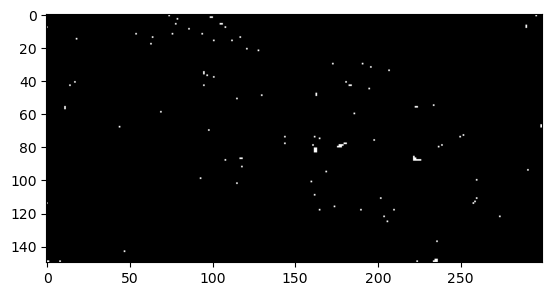

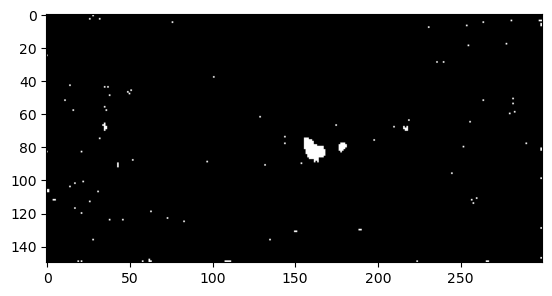

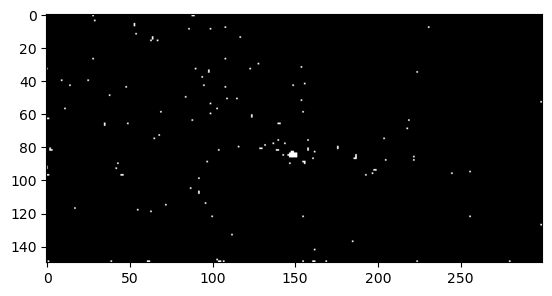

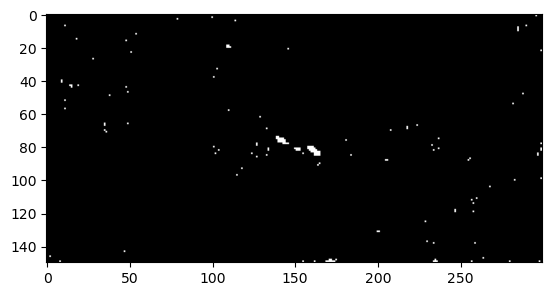

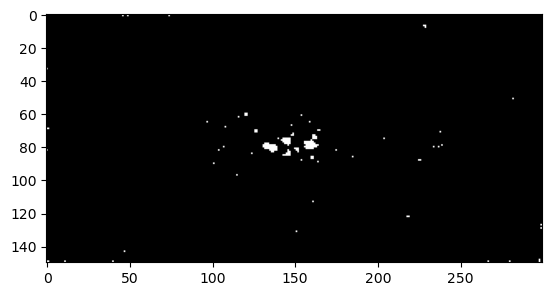

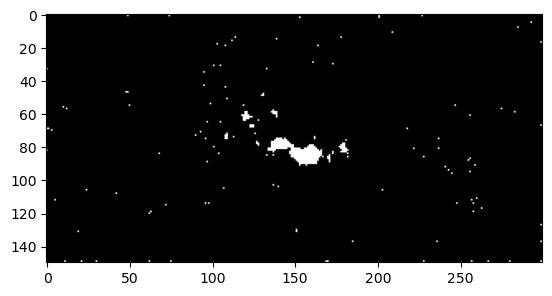

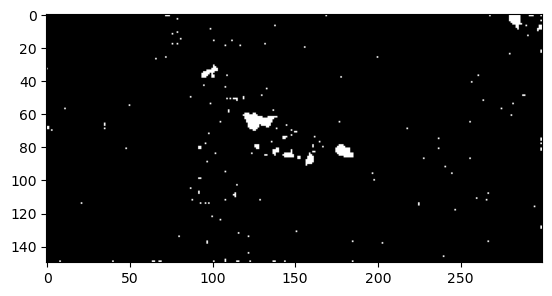

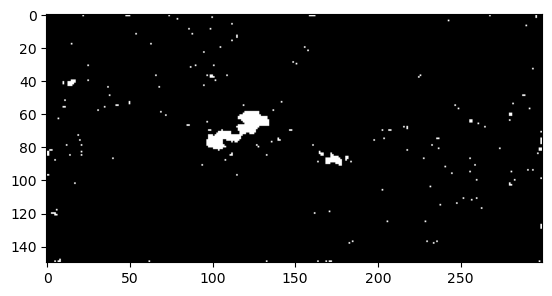

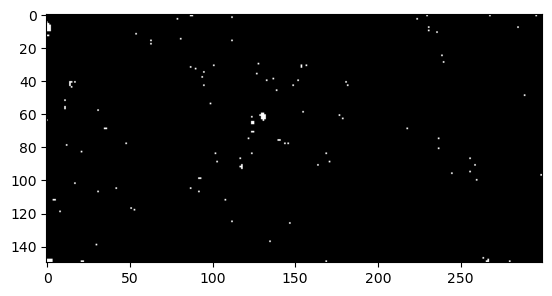

In [37]:
#affichage des images en noir et blanc: 
plt.imshow(image_bw1,cmap="gray",vmax= 1* np.max(image_bw1))
plt.show()
plt.imshow(image_bw2,cmap="gray",vmax= 1* np.max(image_bw2))
plt.show()
plt.imshow(image_bw3,cmap="gray",vmax= 1* np.max(image_bw3))
plt.show()
plt.imshow(image_bw4,cmap="gray",vmax= 1* np.max(image_bw4))
plt.show()
plt.imshow(image_bw5,cmap="gray",vmax= 1* np.max(image_bw5))
plt.show()
plt.imshow(image_bw6,cmap="gray",vmax= 1* np.max(image_bw6))
plt.show()
plt.imshow(image_bw7,cmap="gray",vmax= 1* np.max(image_bw7))
plt.show()
plt.imshow(image_bw8,cmap="gray",vmax= 1* np.max(image_bw8))
plt.show()
plt.imshow(image_bw9,cmap="gray",vmax= 1* np.max(image_bw9))
plt.show()

# Zoom sur la zone d'intérêt 

In [39]:
sx2 = np.s_[80:200] 
sy2 = np.s_[40:110]
imgbw1 = image_bw1[sy2, sx2]
imgbw2 = image_bw2[sy2, sx2]
imgbw3 = image_bw3[sy2, sx2]
imgbw4 = image_bw4[sy2, sx2]
imgbw5 = image_bw5[sy2, sx2]
imgbw6 = image_bw6[sy2, sx2]
imgbw7 = image_bw7[sy2, sx2]
imgbw8 = image_bw8[sy2, sx2]
imgbw9 = image_bw9[sy2, sx2]

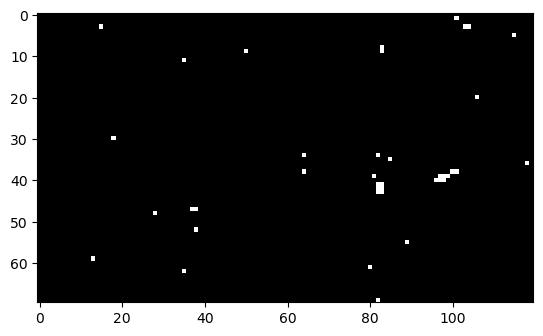

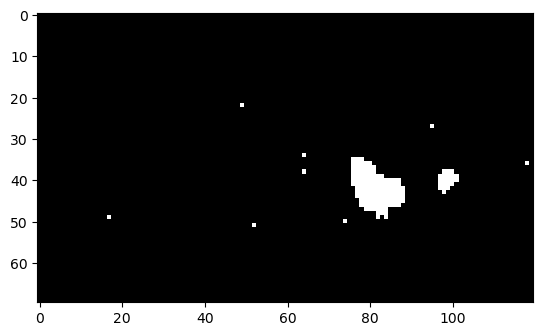

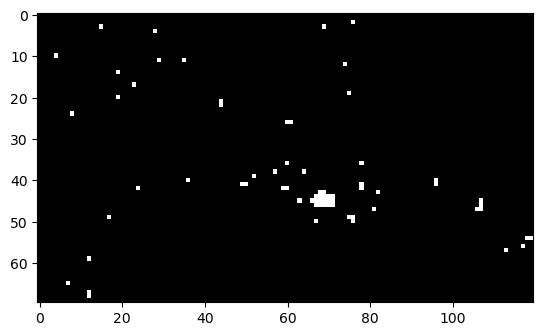

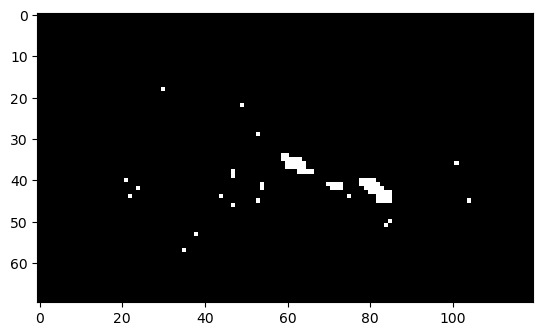

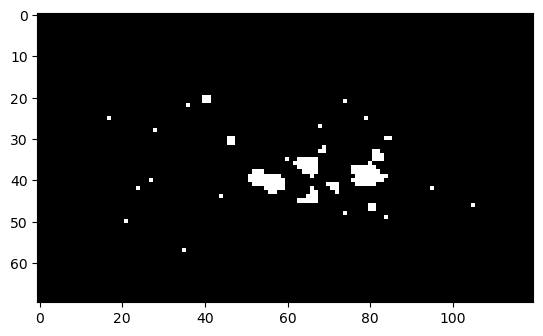

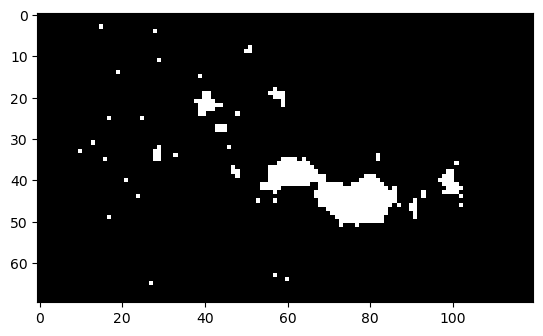

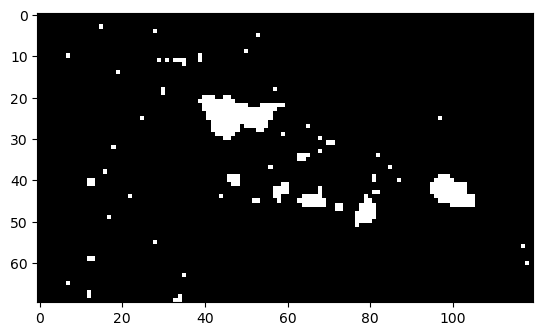

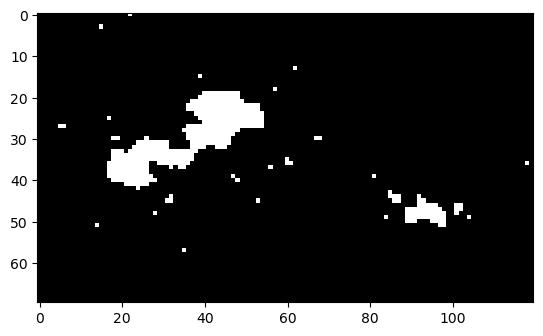

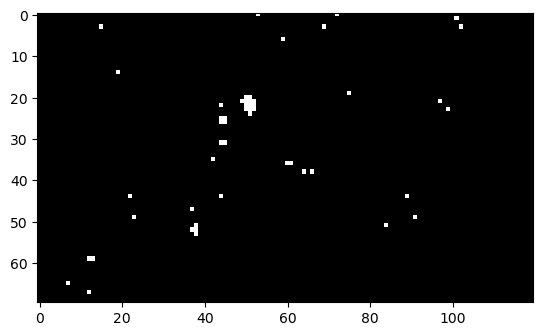

In [40]:
#affichage des images en noir et blanc: 
plt.imshow(imgbw1,cmap="gray",vmax= 1* np.max(imgbw1))
plt.show()
plt.imshow(imgbw2,cmap="gray",vmax= 1* np.max(imgbw2))
plt.show()
plt.imshow(imgbw3,cmap="gray",vmax= 1* np.max(imgbw3))
plt.show()
plt.imshow(imgbw4,cmap="gray",vmax= 1* np.max(imgbw4))
plt.show()
plt.imshow(imgbw5,cmap="gray",vmax= 1* np.max(imgbw5))
plt.show()
plt.imshow(imgbw6,cmap="gray",vmax= 1* np.max(imgbw6))
plt.show()
plt.imshow(imgbw7,cmap="gray",vmax= 1* np.max(imgbw7))
plt.show()
plt.imshow(imgbw8,cmap="gray",vmax= 1* np.max(imgbw8))
plt.show()
plt.imshow(imgbw9,cmap="gray",vmax= 1* np.max(imgbw9))
plt.show()

# Enlever les pixels blancs hors de la zone d'intérêt:

In [41]:
from skimage import io, morphology
from skimage.color import rgb2gray

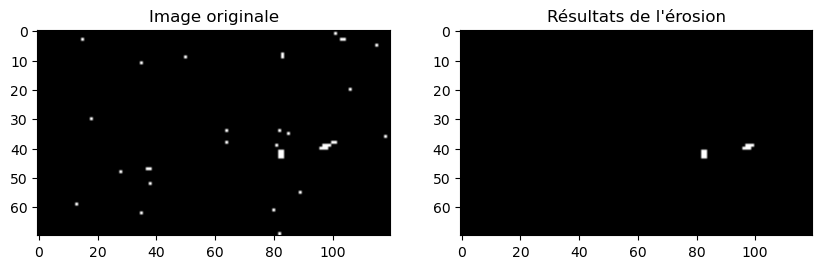

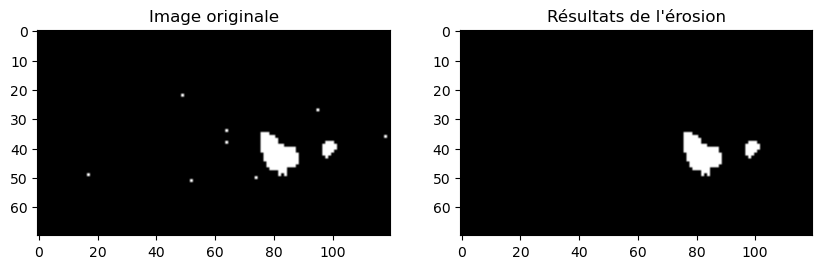

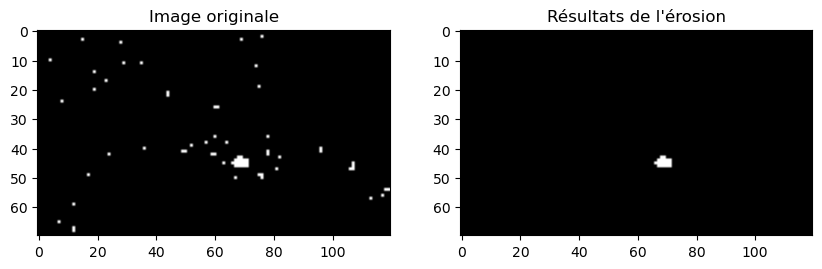

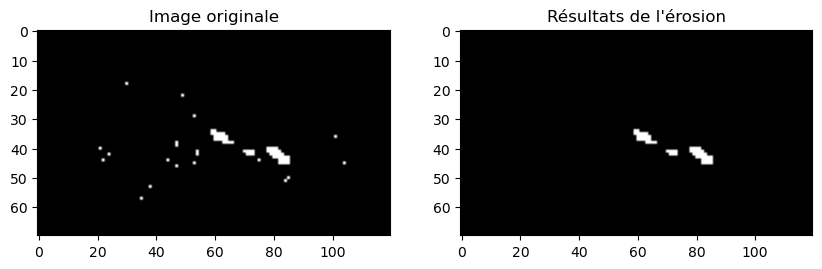

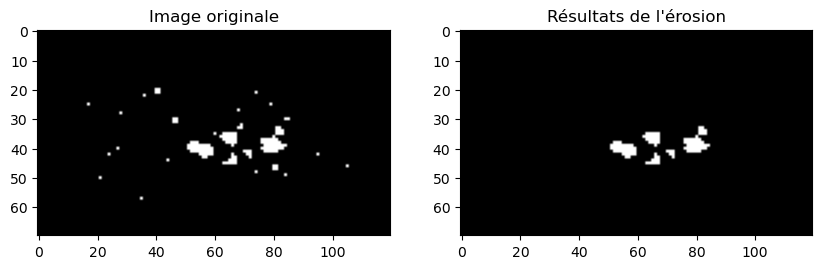

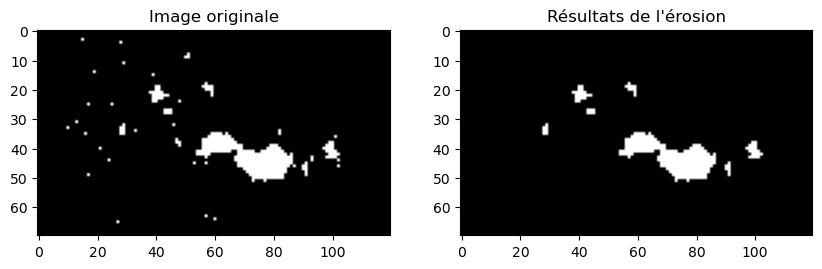

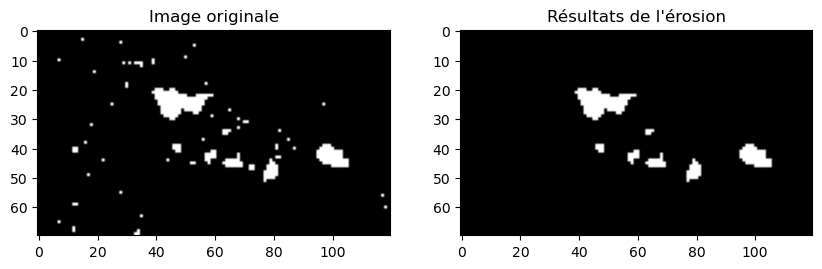

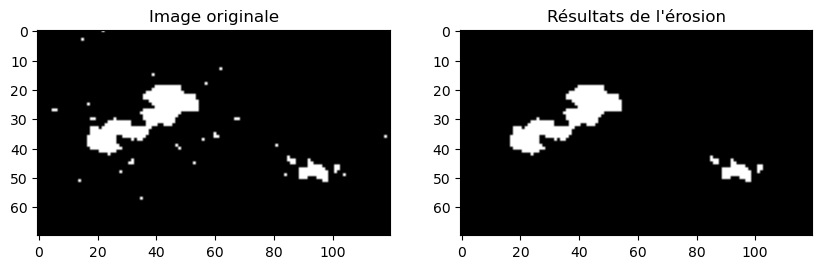

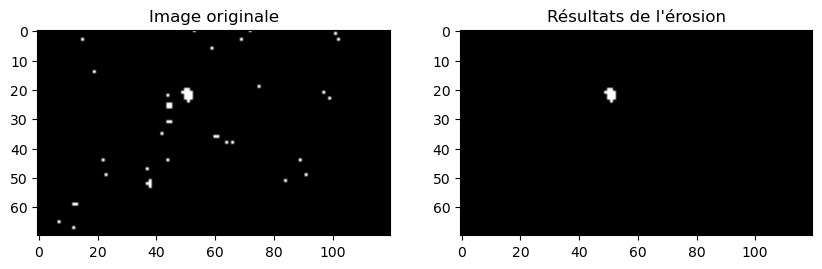

In [45]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def remove_small_spots_skimage(image, min_size):
    # Convertir l'image en niveaux de gris si elle est en couleur
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binariser l'image
    binary_image = image > 0.5  # Ajustez le seuil selon votre image

    # Utiliser la fonction remove_small_objects
    binary_image_no_small = morphology.remove_small_objects(binary_image, min_size=min_size, connectivity=1)

    # Visualiser les résultats
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Image originale')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image_no_small, cmap='gray')
    plt.title("Résultats de l'érosion")

    plt.show()

    return binary_image_no_small

min_size = 5  # Remplacez cela par votre propre taille minimale

# Appliquer la fonction sur vos images
binary_image_no_small_1 = remove_small_spots_skimage(imgbw1, min_size)
binary_image_no_small_2 = remove_small_spots_skimage(imgbw2, min_size)
binary_image_no_small_3 = remove_small_spots_skimage(imgbw3, min_size)
binary_image_no_small_4 = remove_small_spots_skimage(imgbw4, min_size)
binary_image_no_small_5 = remove_small_spots_skimage(imgbw5, min_size)
binary_image_no_small_6 = remove_small_spots_skimage(imgbw6, min_size)
binary_image_no_small_7 = remove_small_spots_skimage(imgbw7, min_size)
binary_image_no_small_8 = remove_small_spots_skimage(imgbw8, min_size)
binary_image_no_small_9 = remove_small_spots_skimage(imgbw9, min_size)

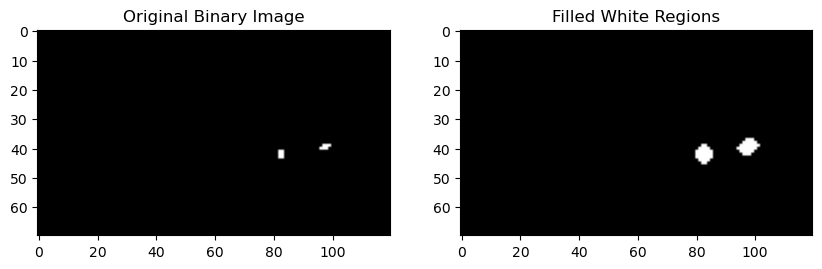

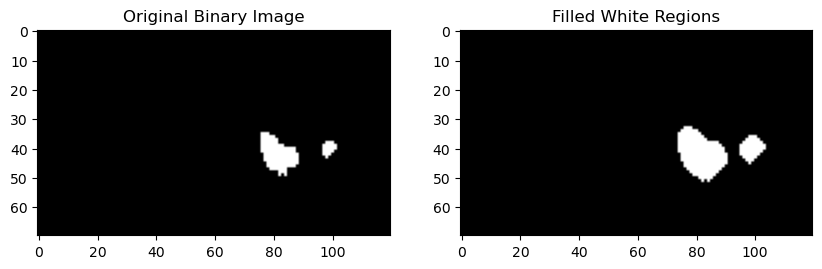

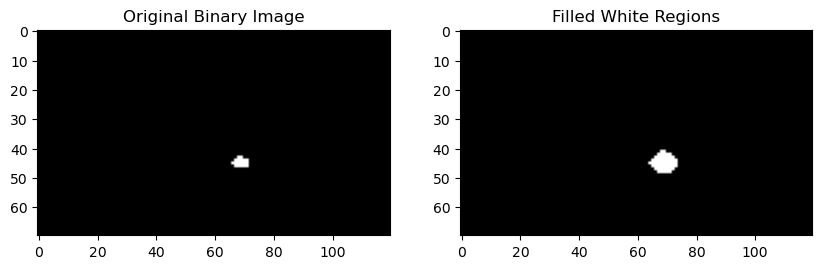

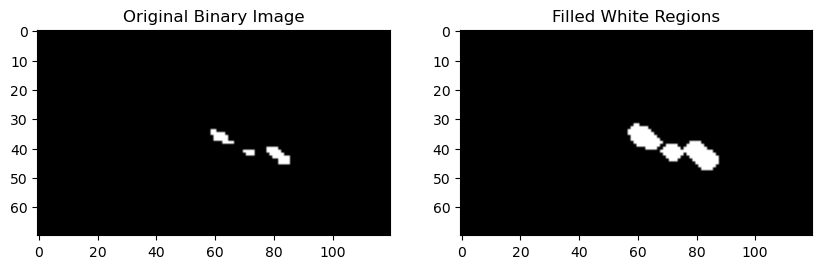

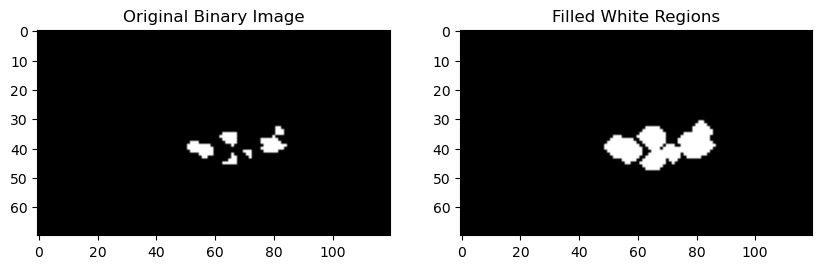

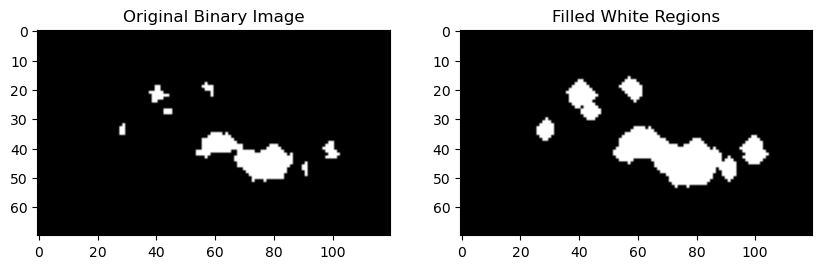

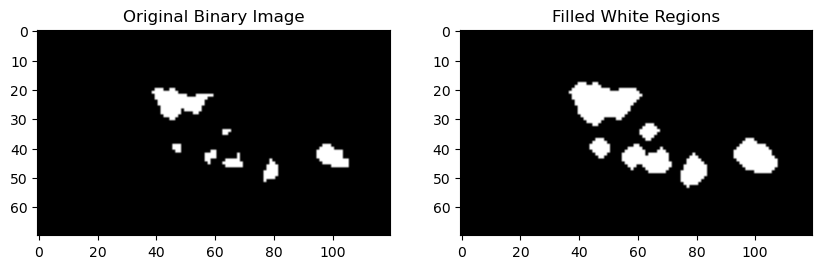

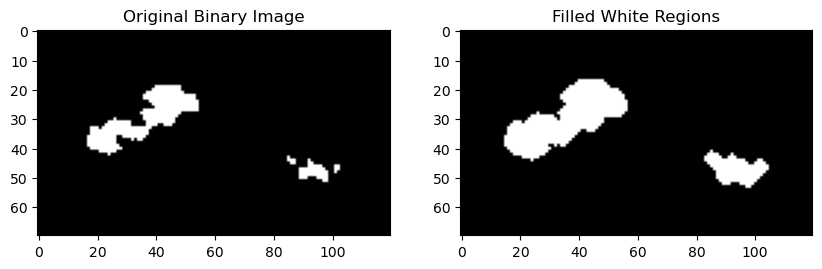

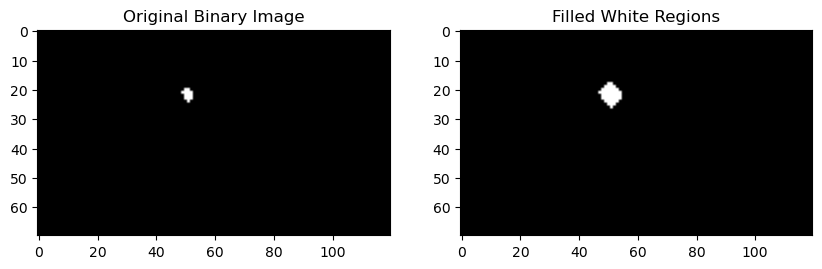

In [46]:
from skimage import morphology, color
import matplotlib.pyplot as plt

def fill_white_regions(image):
    # Convert the image to grayscale if it's in color
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Binarize the image
    binary_image = image > 0.5  # Adjust the threshold according to your image

    # Use binary dilation to fill white regions
    footprint = morphology.disk(2)  # Adjust the disk size as needed
    filled_image = morphology.binary_dilation(binary_image, footprint=footprint)

    # Visualize the results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Original Binary Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filled_image, cmap='gray')
    plt.title('Filled White Regions')

    plt.show()

    return filled_image

# Apply the function to your images
filled_image_1 = fill_white_regions(binary_image_no_small_1)
filled_image_2 = fill_white_regions(binary_image_no_small_2)
filled_image_3 = fill_white_regions(binary_image_no_small_3)
filled_image_4 = fill_white_regions(binary_image_no_small_4)
filled_image_5 = fill_white_regions(binary_image_no_small_5)
filled_image_6 = fill_white_regions(binary_image_no_small_6)
filled_image_7 = fill_white_regions(binary_image_no_small_7)
filled_image_8 = fill_white_regions(binary_image_no_small_8)
filled_image_9 = fill_white_regions(binary_image_no_small_9)

# Surface de la zone blanche

In [49]:
# Compter le nombre de pixels blancs dans l'image
white_pixel_count1 = np.sum(filled_image_1 == 1)
white_pixel_count2 = np.sum(filled_image_2 == 1)
white_pixel_count3 = np.sum(filled_image_3 == 1)
white_pixel_count4 = np.sum(filled_image_4 == 1)
white_pixel_count5 = np.sum(filled_image_5 == 1)
white_pixel_count6 = np.sum(filled_image_6 == 1)
white_pixel_count7 = np.sum(filled_image_7 == 1)
white_pixel_count8 = np.sum(filled_image_8 == 1)
white_pixel_count9 = np.sum(filled_image_9 == 1)

print("Nombre de pixels de la zone blanche dans la premiere image: {} pixels carrés".format(white_pixel_count1))
print("Nombre de pixels de la zone blanche dans la deuxième image: {} pixels carrés".format(white_pixel_count2))
print("Nombre de pixels de la zone blanche dans la troisième image: {} pixels carrés".format(white_pixel_count3))
print("Nombre de pixels de la zone blanche dans la quatrième image: {} pixels carrés".format(white_pixel_count4))
print("Nombre de pixels de la zone blanche dans la cinquième image: {} pixels carrés".format(white_pixel_count5))
print("Nombre de pixels de la zone blanche dans la sixième image: {} pixels carrés".format(white_pixel_count6))
print("Nombre de pixels de la zone blanche dans la septième image: {} pixels carrés".format(white_pixel_count7))
print("Nombre de pixels de la zone blanche dans la huitième image: {} pixels carrés".format(white_pixel_count8))
print("Nombre de pixels de la zone blanche dans la neuvième image: {} pixels carrés".format(white_pixel_count9))

Nombre de pixels de la zone blanche dans la premiere image: 60 pixels carrés
Nombre de pixels de la zone blanche dans la deuxième image: 588 pixels carrés
Nombre de pixels de la zone blanche dans la troisième image: 54 pixels carrés
Nombre de pixels de la zone blanche dans la quatrième image: 174 pixels carrés
Nombre de pixels de la zone blanche dans la cinquième image: 326 pixels carrés
Nombre de pixels de la zone blanche dans la sixième image: 685 pixels carrés
Nombre de pixels de la zone blanche dans la septième image: 592 pixels carrés
Nombre de pixels de la zone blanche dans la huitième image: 718 pixels carrés
Nombre de pixels de la zone blanche dans la neuvième image: 43 pixels carrés


Dans notre cas de données sentinel-1 IW, la cellule de resolution a la taille de 5*20 m = 100 m²

In [52]:
# Afficher la surface de la zone blanche en pixels carrés
surface1 = white_pixel_count1*100
surface2 = white_pixel_count2*100
surface3 = white_pixel_count3*100
surface4 = white_pixel_count4*100
surface5 = white_pixel_count5*100
surface6 = white_pixel_count6*100
surface7 = white_pixel_count7*100
surface8 = white_pixel_count8*100
surface9 = white_pixel_count9*100

print("Surface de la zone blanche dans la premiere image: {} mètre carrés".format(surface1))
print("Surface de la zone blanche dans la deuxième image: {} mètre carrés".format(surface2))
print("Surface de la zone blanche dans la troisième image: {} mètre carrés".format(surface3))
print("Surface de la zone blanche dans la quatrième image: {} mètre carrés".format(surface4))
print("Surface de la zone blanche dans la cinquième image: {} mètre carrés".format(surface5))
print("Surface de la zone blanche dans la sixième image: {} mètre carrés".format(surface6))
print("Surface de la zone blanche dans la septième image: {} mètre carrés".format(surface7))
print("Surface de la zone blanche dans la huitième image: {} mètre carrés".format(surface8))
print("Surface de la zone blanche dans la neuvième image: {} mètre carrés".format(surface9))

Surface de la zone blanche dans la premiere image: 6000 mètre carrés
Surface de la zone blanche dans la deuxième image: 58800 mètre carrés
Surface de la zone blanche dans la troisième image: 5400 mètre carrés
Surface de la zone blanche dans la quatrième image: 17400 mètre carrés
Surface de la zone blanche dans la cinquième image: 32600 mètre carrés
Surface de la zone blanche dans la sixième image: 68500 mètre carrés
Surface de la zone blanche dans la septième image: 59200 mètre carrés
Surface de la zone blanche dans la huitième image: 71800 mètre carrés
Surface de la zone blanche dans la neuvième image: 4300 mètre carrés


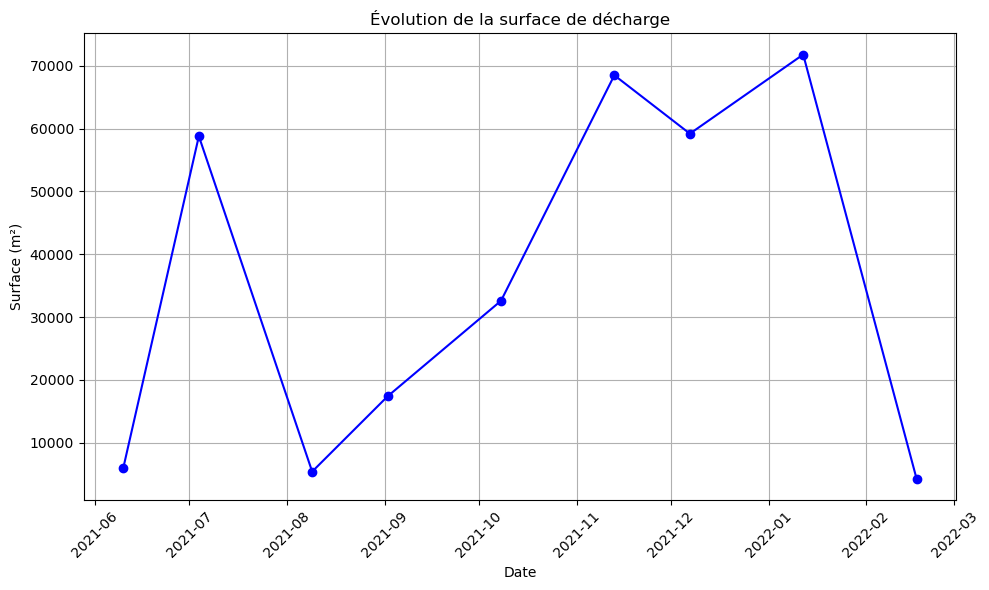

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, MonthLocator

# Supposons que vous avez des données de dates et de surfaces
dates = ["10/06/2021","04/07/2021","09/08/2021","02/09/2021","08/10/2021","13/11/2021","07/12/2021","12/01/2022","17/02/2022"]

# Conversion des dates en objets datetime
date_objects = [datetime.strptime(date, "%d/%m/%Y") for date in dates]

# Supposons que vous ayez des valeurs de surface (remplacez surface1, surface2, etc. par vos valeurs réelles)
surfaces = [surface1, surface2, surface3, surface4, surface5, surface6, surface7, surface8, surface9]

# Tracer l'évolution de la surface en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(date_objects, surfaces, marker='o', linestyle='-', color='b')
plt.title('Évolution de la surface de décharge')
plt.xlabel('Date')
plt.ylabel('Surface (m²)')

# Utiliser AutoDateLocator pour ajuster automatiquement l'échelle des dates
locator = AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(AutoDateFormatter(locator))

# Ajouter les mois à l'axe des x
plt.gca().xaxis.set_minor_locator(MonthLocator())
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
